In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

iris = np.genfromtxt('iris_2D_3c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:2]
y = iris[:, 2]

# change data type
y = y.astype('uint8')

print('X:\n', X)
print('y:\n', y)

X:
 [[1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [4.7 1.6]
 [3.3 1.1]
 [4.6 1.3]
 [5.6 2.2]
 [5.1 1.5]
 [5.6 1.4]]
y:
 [0 0 0 1 1 1 2 2 2]


In [2]:
N = 9
d = 3 # dimensionality
k = 3 # number of classes

# one_hot
def convert_one_hot(y, k):  
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_one_hot = convert_one_hot(y, k)
print(y_one_hot)

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
print(X)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.6 0.2]
 [1.  4.7 1.6]
 [1.  3.3 1.1]
 [1.  4.6 1.3]
 [1.  5.6 2.2]
 [1.  5.1 1.5]
 [1.  5.6 1.4]]


In [8]:
# initialize parameters
theta = 0.01 * np.random.randn(d, k)
print('theta:\n', theta)

theta:
 [[ 0.00954774 -0.00406744 -0.01857285]
 [ 0.00920197 -0.00261997  0.01256923]
 [ 0.00495131  0.01174362 -0.00307726]]


In [9]:
# some parameters
learning_rate = 0.01
losses = []
num_iter = 3000

for epoch in range(num_iter):
    # evaluate class scores
    z = X.dot(theta)    

    #compute the class probabilities
    exp_z = np.exp(z)    
    y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # compute the loss
    loss = -np.log(np.sum(y_hat*y_one_hot, axis=1))
    losses.append(np.sum(loss))

    # compute the gradient on scores
    dz = y_hat - y_one_hot

    # backpropate the gradient to the parameters (W,b)
    dtheta = X.T.dot(dz)

    # perform a parameter update
    theta = theta - learning_rate*dtheta

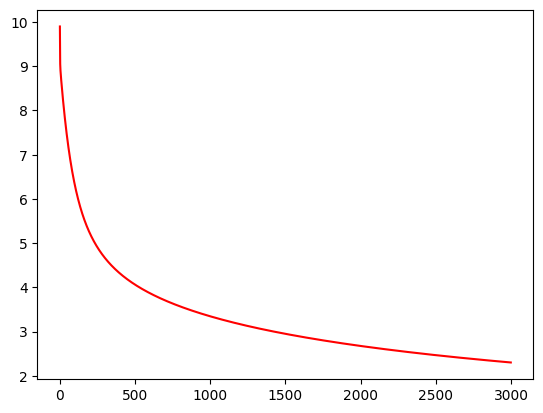

In [10]:
x_axis = range(len(losses))
plt.plot(x_axis, losses, color="r")
plt.show()

In [11]:
z = X.dot(theta)    
exp_z = np.exp(z)
y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)
print(y_hat)

[[9.52552030e-01 4.72972109e-02 1.50759504e-04]
 [9.55281829e-01 4.46012999e-02 1.16871044e-04]
 [9.49658541e-01 5.01470197e-02 1.94439304e-04]
 [1.12453751e-03 5.69699658e-01 4.29175805e-01]
 [5.54346887e-02 8.87216584e-01 5.73487275e-02]
 [5.69893773e-03 5.72821940e-01 4.21479122e-01]
 [1.22808417e-05 2.43169152e-01 7.56818568e-01]
 [9.42692404e-04 3.63686210e-01 6.35371097e-01]
 [5.39584095e-04 1.68589921e-01 8.30870495e-01]]


In [12]:
predicted_class = np.argmax(y_hat, axis=1)
print(predicted_class)

[0 0 0 1 1 1 2 2 2]
